In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

#import data
df = pd.read_csv('E:/Users/Colin/Documents/Data Science/Projects/Some dumb MTG shit/mtgcarddata.csv')

#Look at the first few rows
df.head()

,id,artist,colorIdentity,colors,manaValue,flavorText,frameVersion,isOversized,isPromo,isOnlineOnly,...,printings,rarity,setCode,subtypes,text,toughness,type,types,uuid,releaseDate
0,1,Pete Venters,W,W,7,NaN,future,0,0,0,...,"10E,JUD,UMA",uncommon,10E,"Human,Cleric",First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,2007-07-13
1,2,Pete Venters,W,W,7,"""The will of all, by my hand done.""",2003,0,0,0,...,"10E,JUD,UMA",uncommon,10E,"Human,Cleric",First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,2007-07-13
2,3,Volkan Baǵa,W,W,5,Every tear shed is a drop of immortality.,2003,0,0,0,...,"10E,8ED,9ED,DDC,DVD,IMA,INV,JMP,MB1,P02,PS11,P...",uncommon,10E,Angel,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,2007-07-13
3,4,Volkan Baǵa,W,W,5,Every tear shed is a drop of immortality.,2003,0,0,0,...,"10E,8ED,9ED,DDC,DVD,IMA,INV,JMP,MB1,P02,PS11,P...",uncommon,10E,Angel,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,2007-07-13
4,5,Mark Zug,W,W,3,Only the warrior who can admit mortal weakness...,2003,0,0,0,...,"10E,9ED,EXO,P02,POR,PS11,S00,S99,TPR",common,10E,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,2007-07-13


I already trimmed down the number of columns pretty immensely using a SQL query so I know what's in these columns already but let's take a look anyway.
I took basically every column that I think would actually be useful to look at or at least interesting.

One thing I am interested to see is what the difference between "colorIdentity" and "colors" is, if anything. Additionally, I'll do a couple other preprocessing steps thanks to a few categorical variables: 
-I'll be removing all cards that are "promos", being cards that aren't in traditional sets and are usually part of giveaways or redemption programs.
-I'll be removing all cards that are labeled as "online only".
-I'll be removing all cards that are labeled as "oversized".
-I'll be removing all cards that are labeled as "funny" which includes all of the "Un-" sets which are typically all joke cards.

In [44]:
#Preprocessing first:
df = df.drop(df[df['isPromo'] == 1].index)
df = df.drop(df[df['isOnlineOnly'] == 1].index)
df = df.drop(df[df['isOversized'] == 1].index)
df = df.drop(df[df['isFunny'] == 1].index)

#Find unique values in 'colorIdentity' and 'colors'
ci = df['colorIdentity'].unique()
c = df['colors'].unique()

print(ci)
print(c)

['W' 'U' 'B' 'R' 'G' nan 'B,G,R,U,W' 'U,W' 'R,W' 'G,W' 'B,W' 'G,R' 'B,G'
 'R,U' 'B,R' 'B,U' 'G,U' 'B,R,W' 'B,G,W' 'B,U,W' 'G,R,U' 'G,R,W' 'G,U,W'
 'R,U,W' 'B,G,R' 'B,R,U' 'B,G,U' 'B,G,U,W' 'B,R,U,W' 'G,R,U,W' 'B,G,R,W'
 'B,G,R,U']
['W' 'U' 'B' 'R' 'G' nan 'B,G,W' 'U,W' 'B,U' 'B,U,W' 'B,W' 'G,R,U' 'R,U'
 'B,R' 'B,G' 'G,R' 'G,R,W' 'R,W' 'G,U,W' 'G,U' 'B,G,R,U,W' 'G,W' 'B,R,W'
 'R,U,W' 'B,G,R' 'B,R,U' 'B,G,U' 'B,G,U,W' 'B,R,U,W' 'G,R,U,W' 'B,G,R,W'
 'B,G,R,U' 'W,U' 'U,B' 'U,G' 'W,R' 'U,R' 'R,G' 'W,G' 'W,B']


We end up with a series of 40 values in "colors" and a series of 32 values in "colorIdentity" which is odd, so let's see what the differences are.
We also have some values with "NaN" which may be Colorless cards which I will verify.

In [45]:
#Set values to strings
cstr = c.astype(str)
cistr = ci.astype(str)

#Find the differing values and print.
difference = np.setdiff1d(cstr, cistr)
print(difference)

#Identify the 'nan' values.
df_nan = df[df['colorIdentity'].isna()]

df_nan.head()

['R,G' 'U,B' 'U,G' 'U,R' 'W,B' 'W,G' 'W,R' 'W,U']


,id,artist,colorIdentity,colors,manaValue,flavorText,frameVersion,isOversized,isPromo,isOnlineOnly,...,printings,rarity,setCode,subtypes,text,toughness,type,types,uuid,releaseDate
421,422,Alan Pollack,NaN,NaN,2,"If taken, it cuts the hand that clutches it. I...",2003,0,0,0,...,"10E,9ED,DDC,DST,DVD,M10,M11,M12,PS11",uncommon,10E,NaN,"Whenever a player casts a white spell, you may...",NaN,Artifact,Artifact,da0a5791-2fc2-53e4-bc8b-c4d8cd026ded,2007-07-13
422,423,Ben Thompson,NaN,NaN,3,Reinforcements . . . or refreshments?,2003,0,0,0,...,"10E,9ED,C14,CM2,DD2,F03,JVC,MB1,MRD,PRM,PS11,T...",uncommon,10E,Gnome,Sacrifice Bottle Gnomes: You gain 3 life.,3,Artifact Creature — Gnome,"Artifact,Creature",8402d391-a810-5c04-af77-d3fb01dbacca,2007-07-13
423,424,Michael Sutfin,NaN,NaN,4,The staff unraveled in a chaotic chorus of cla...,2003,0,0,0,...,"10E,USG",rare,10E,NaN,{X}: Chimeric Staff becomes an X/X Construct a...,NaN,Artifact,Artifact,da8f1e81-fc1f-57f4-b4ec-0c5445a299e8,2007-07-13
424,425,Alex Horley-Orlandelli,NaN,NaN,1,NaN,2003,0,0,0,...,"10E,2XM,BRR,MB1,TSP,TSR",uncommon,10E,NaN,"{1}, {T}, Sacrifice Chromatic Star: Add one ma...",NaN,Artifact,Artifact,3785490a-01f5-511d-b471-60b1209b3d4f,2007-07-13
425,426,Greg Hildebrandt,NaN,NaN,5,Each note of the flute mimics the call of a di...,2003,0,0,0,...,"10E,USG",rare,10E,NaN,"{X}, {T}: Search your library for a creature c...",NaN,Artifact,Artifact,b0a0f3ea-f483-53e3-ae41-bdb409141fdf,2007-07-13


So looking a bit further it seems the issue stems from color identities being listed in different orders.

Just for some context, Magic: the Gathering cards can be any number from one to five of the following colors: W - White, U - Blue, B - Black, R - Red, and G - Green.
The data has some situations where, for example, a card that is White and Blue is labeled as U,W and as W,U which represents the exact same thing. So we'll need to do a bit more preprocessing to fix this.
The accepted order among Magic: the Gathering players is "WUBRG" so I'll be setting everything in that order.

As far as our "NaN" values, it does seem to be confirmed that these are our Colorless cards, so I'll be setting all of these to the value "Colorless".

In [46]:
color_order = ['W', 'U', 'B', 'R', 'G']

#Define a formula to transform each column of the dataframe.
def transform_values(value):
    if isinstance(value, str):
        letters = value.split(',')
        sorted_letters = sorted(letters, key=lambda x: color_order.index(x) if x in color_order else len(color_order))
        return ','.join(sorted_letters)
    return value

# Apply the formula to the columns
df['colors'] = df['colors'].apply(transform_values)
df['colorIdentity'] = df['colorIdentity'].apply(transform_values)

#Fill the NaN values with "Colorless"
df['colors'] = df['colors'].fillna('Colorless')
df['colorIdentity'] = df['colorIdentity'].fillna('Colorless')

#Use the same method as above to check to make sure it worked
ci_transformed = df['colorIdentity'].unique()
c_transformed = df['colors'].unique()

cstr_transformed = c_transformed.astype(str)
cistr_transformed = ci_transformed.astype(str)

#Find the differing values and print.
difference_transformed = np.setdiff1d(cstr_transformed, cistr_transformed)
print(difference_transformed)

[]


No more differing values, "colors" and "colorIdentity" now have the same unique values because we sorted everything by "WUBRG" order.
We also replaced all of our "NaN" values with "Colorless" as that's the correct term used in the game.

Per the source (https://mtgjson.com/data-models/card-atomic/), the primary difference in "colors" and "colorIdentity" is that "colorIdentity" includes colors that appear in text and in situations like cards that flip or have two halves. To make things simple, we'll look at "colorIdentity" primarily.

Now that we've got some of the preprocessing out of the way, let's look at some statistics. We'll start with the total number of cards of each color.
As there are tons of different combinations for multicolored cards. We'll combine all of these as "Multicolored".

Text(0.5, 1.0, 'Distribution of Color Identity in Magic: the Gathering Cards')

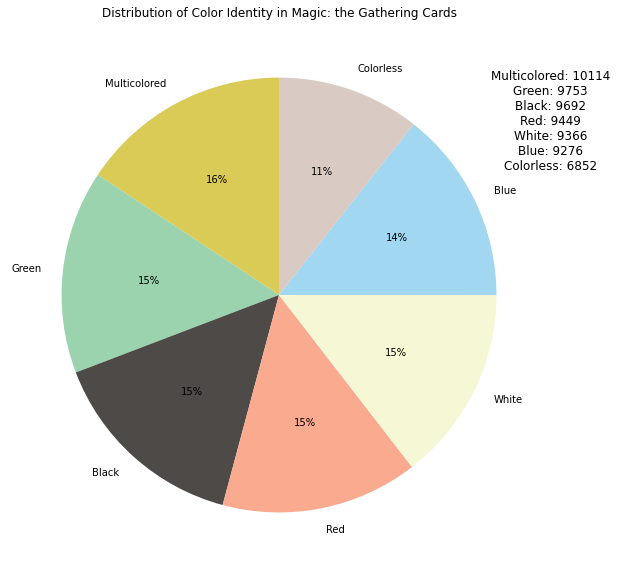

In [47]:
#Replace multicolored colors with "Multicolored"
df_color = df.copy()
df_color['colorIdentity'] = df['colorIdentity'].apply(lambda x: 'Multicolored' if ',' in x else x)

#Count total sum of each color.
color_counts = df_color['colorIdentity'].value_counts().reset_index()

#Replace the single letter values to be the full color names
color_counts['index'] = color_counts['index'].replace('W', 'White')
color_counts['index'] = color_counts['index'].replace('U', 'Blue')
color_counts['index'] = color_counts['index'].replace('B', 'Black')
color_counts['index'] = color_counts['index'].replace('R', 'Red')
color_counts['index'] = color_counts['index'].replace('G', 'Green')

#Set colors for the pie chart for aesthetics
colors = ['#DACB56','#9BD3AE','#4D4A48','#F9AA8F','#F6F7D5','#A1D7F1','#D9CAC3']
#This goes in order from highest to lowest so just for future identification, that order is:
#Multicolored, Green, Black, Red, White, Blue, Colorless

#Pie chart time
plt.figure(figsize=(10, 10))
plt.pie(color_counts['colorIdentity'], labels=color_counts['index'], colors = colors, autopct='%1.0f%%', startangle = 90)
plt.gca().set_facecolor('white')
labels = [f'{category}: {count}' for category, count in zip(color_counts['index'], color_counts['colorIdentity'])]
plt.gca().annotate('\n'.join(labels), xy=(1.25, 0.8), va='center', ha='center', fontsize=12)
plt.title('Distribution of Color Identity in Magic: the Gathering Cards')

We see a mostly equal distribution between each color. Multicolored cards are our highest count, but not by too much. Interestingly enough, there's only slightly more than 500 more of our highest monocolored type (Green) compared to our lowest (Blue). This is pretty surprising given how long this came has been out, I would have suspected that the gap between colors would have been much larger.

Next I want to take a look at the cards with the highest number of reprints. We're going to exclude basic lands from this, as they are reprinted in every single set.

In [48]:
#Copy the data frame
df_reprints = df.copy()

#Replace printings column with printings no longer separated by commas
df_reprints['printings'] = df_reprints['printings'].str.split(',')

#Counting total number of printings
df_reprints['count of printings'] = df_reprints['printings'].apply(lambda x: len(x))

#Drop all rows with "Basic Land" in the "type" column
df_reprints = df_reprints[~df_reprints['type'].str.contains('Basic Land')]

#Sort rows by highest number of printings
df_reprints = df_reprints.sort_values(by='count of printings', ascending = False)

#Find the top 10 unique values and print
top_10_reprints = df_reprints[['name','count of printings']].drop_duplicates().head(10)
print(top_10_reprints)

                       name  count of printings
18043        Evolving Wilds                  53
3152               Sol Ring                  52
40720  Swords to Plowshares                  51
36291          Counterspell                  50
26828          Giant Growth                  50
5106            Serra Angel                  48
63590            Disenchant                  45
7231            Dark Ritual                  45
5533         Llanowar Elves                  44
62421  Terramorphic Expanse                  41


We've got quite a decent handful of cards that have around 50 printings across all sets. Cards like Evolving Wilds and Terramorphic Expanse are fairly mid-valued cards that interact with Basic Lands, making them very easy cards to reprint without too much of a negative impact on the Standard format meta, while cards like Sol Ring and Swords to Plowshares are likely very high in printings due to "eternal" format printings such as for Commander sets.

I want to next take a look at the game's progression over time. We have data on release date of each set, so I want to see the number of new cards released each year since the game's inception in 1993.

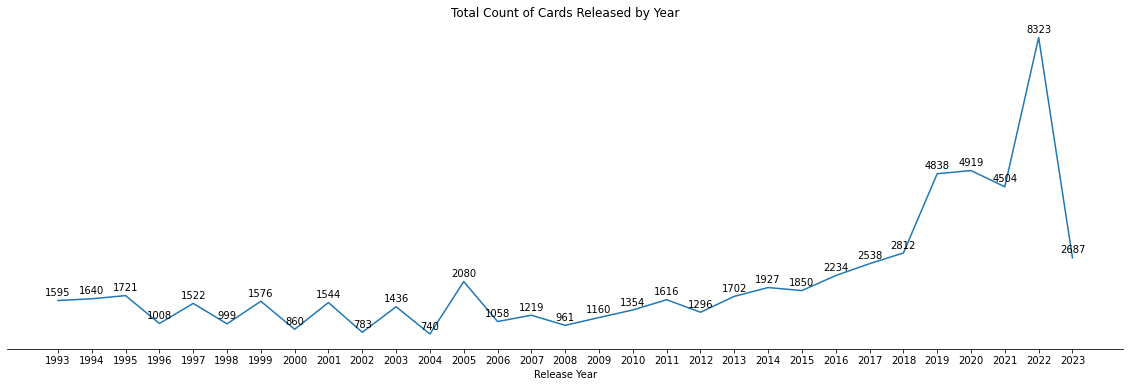

In [49]:
#Copy a new dataframe to work with
df_year = df.copy()

#In my case, I only care about the year so I'm replacing the release date column.
df_year['release year'] = pd.to_datetime(df_year['releaseDate']).dt.year

#Grouping by year to get total count
df_year_agg = df_year.groupby('release year').size().reset_index(name='card count')

#Time to visualize
plt.figure(figsize=(20, 6))
sns.lineplot(data = df_year_agg, x='release year', y='card count')
sns.despine(left=True)
plt.title('Total Count of Cards Released by Year')
plt.yticks([])
plt.xticks(df_year_agg['release year'])
plt.ylabel('')
plt.xlabel('Release Year')

#Add labels
for i, count in enumerate(df_year_agg['card count']):
    plt.annotate(str(count), (df_year_agg['release year'].iloc[i], count), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

From 1993 until about 2015 we can see that there's a pretty standard number of cards per year, but beginning in 2016 we start seeing an increase in the number of cards printed each year, up to a massive explosion in 2022 with over 8,000 cards printed! 
We see a sharp decrease in 2023, but since we're still in the early stages of the year, our data is incomplete and it's tough to say what the future holds! 
Normally I'd avoid including every year on the xticks like this, but I considered that each year was an important factor and so I included all of them.

Next let's look at card rarity. Rarity is another method by which individual cards can be valued, as cards that are more rare are typically less available than cards of lower rarity. Additionally, cards that are more rare also tend to be more powerful than less rare cards.

Magic cards fall under 4 rarity levels: Common, Uncommon, Rare, and Mythic Rare. To address rarity, let's look at a chart of the sum of all cards of each rarity level, based on my understanding I'd expect to see a noticeable decrease in the number of cards as the rarity level increases.

In [50]:
#Copy dataframe
df_rarity = df.copy()

df_rarity = df_rarity.groupby('rarity').size().reset_index(name='card count')
df_rarity = df_rarity.sort_values('card count', ascending=False).reset_index(drop = True)
df_rarity.head()

,rarity,card count
0,common,22681
1,rare,19548
2,uncommon,17990
3,mythic,4033
4,special,250


As expected we see a noticeable decrease between common cards than the other rarities, however there are also more rare cards than uncommon cards which goes against my previous expectations.
We also have "special" cards which, according to the data source documentation, refers to the "Timeshifted" cards.

Reprinted Magic cards are typically printed at the same rarity, but on occasion the rarity can change as some cards were printed at mythic rare quality before mythic rares existed (mythic rares did not exist until Shards of Alara in 2008, roughly 15 years after Alpha). To try to address changes due to reprinted cards, I'm going to sort the dataset by release date and remove all instances of cards after the first appearance of them.

In [51]:
df_rarity_unique = df.copy()

df_rarity_unique = df_rarity_unique.sort_values('releaseDate').drop_duplicates('name', keep = 'first')

df_rarity_unique_agg = df_rarity_unique.groupby('rarity').size().reset_index(name='card count')
df_rarity_unique_agg = df_rarity_unique_agg.sort_values('card count', ascending=False).reset_index(drop = True)
df_rarity_unique_agg.head()

,rarity,card count
0,common,8634
1,uncommon,7539
2,rare,7496
3,mythic,1313
4,special,3


After removing reprints, I did the same rarity sorting and now it makes a bit more sense. I don't get drastically more uncommons than rares, but there is still a pattern that makes sense.

We still get 3 "special" cards which is interesting as Timeshifted cards are typically reprinted cards from older sets, so let's take a closer look at what exactly those cards are.

In [52]:
timeshiftedCards = df_rarity_unique[df_rarity_unique['rarity'] =='special']
timeshiftedCards.head()

,id,artist,colorIdentity,colors,manaValue,flavorText,frameVersion,isOversized,isPromo,isOnlineOnly,...,printings,rarity,setCode,subtypes,text,toughness,type,types,uuid,releaseDate
73610,73611,Rob Alexander,Colorless,Colorless,0,NaN,1997,0,0,0,...,"PHPR,PRM,TSB",special,TSB,NaN,"{3}, {T}: Tap target creature you control and ...",NaN,Land,Land,3b7b683f-240d-5a25-b545-4d6c5df9dfe6,2006-10-06
19572,19573,Seb McKinnon,Colorless,Colorless,5,It is everything and nothing.,2015,0,0,0,...,"CMR,PRM",special,CMR,Shapeshifter,"If The Prismatic Piper is your commander, choo...",3,Legendary Creature — Shapeshifter,Creature,38cea5f8-c06a-5b0d-a736-a27027d723ad,2020-11-20
16804,16805,Gaboleps,Colorless,Colorless,5,NaN,2015,0,0,0,...,CLB,special,CLB,Background,"If Faceless One is your commander, choose a co...",3,Legendary Enchantment Creature — Background,"Enchantment,Creature",ad82cd8d-c3e4-5c4d-9a01-a7d74086bbed,2022-06-10


Our three cards are "Arena" which is a Time Spiral card that appears to have been "pre-printed" rather than reprinted and was not printed again until some promotional set.
"The Prismatic Piper" which is a special card from Commander Legends, and Faceless One which is another Commander Legends card from "Battle for Baldur's Gate".

So of the "special" cards left from the purging of reprints, only one is actually a Timeshifted card still, which means that it's likely a lot of the other 247 special cards are not Timeshifted as well.

Let's return back to our rarity set and do a quick visualization.

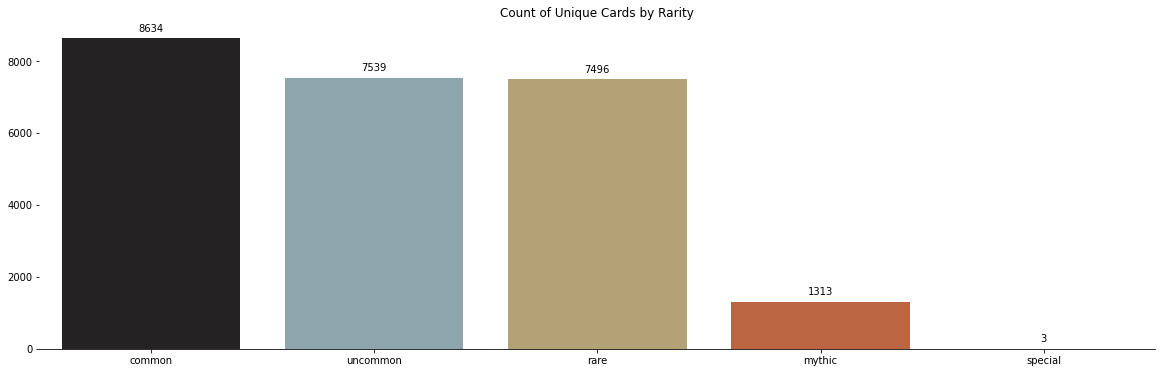

In [58]:
colors = ['#242223', '#87A9B3', '#BDA76B', '#D05E2C']
plt.figure(figsize=(20, 6))
ax = sns.barplot(data = df_rarity_unique_agg, x='rarity', y='card count', palette=colors)
sns.despine(left=True)
plt.title('Count of Unique Cards by Rarity')
plt.ylabel('')
plt.xlabel('')

#Add labels
for i, count in enumerate(df_rarity_unique_agg['card count']):
    ax.annotate(format(count, '.0f'), (i, count), textcoords="offset points", xytext=(0, 5),
                ha='center', va='bottom', fontsize=10)
    
plt.show()

As Magic: The Gathering is such an enormous product that has been around for nearly 30 years, this EDA is only barely scratching the surface at what there is to learn about this game.
However, we did come across a few key insights:

• The number of cards of each color identity are actually very well balanced. It's to be expected that some colors might have more cards than others after such a long time, but the discrepancy isn't nearly as large as one might think.

• The number of times some cards have been reprinted is actually rather astounding. I knew some cards surely have had maybe 10-20 reprints over the years, but Evolving Wilds having been reprinted over 50 times is amazing. It's a rather low value card so it being reprinted this many times hasn't shaken up the game at its core or anything, but I still didn't expect the numbers to be quite that high.

• The number of cards printed each year has really skyrocketed recently in the last 3 or 4 years. Whether this trend continues remains to be seen, but it will be interesting to see if the number of cards printed settles down at any point or if it will continue to climb.

• Rarity is an interesting topic and it's not as obvious as I initially thought. I expected that the number of cards of each rarity dropped off drastically as cards became more rare, but the number of rares and uncommons is actually almost nearly equal, which seems to me that Wizards of the Coast seems to like printing cards at rarity. As cards become more rare, the mechanics and stats on those cards get to be more interesting which gennerally leads to more engaging gameplay.

As I discover more, I'll likely be updating this EDA, so stay tuned!